# Seaborn e Matplotlib

Assim como o Pandas expande as funcionalidades no Numpy para implementar funcionalidades de obtenção, análise e processamento de dados, o Seaborn expande as funcionalidades do Matplotlib, que viemos usando nas últimas semanas. 

Ao invés de implementar novas funcionalidades, o Seaborn na maior parte do tempo está utilizando as funções do Matplotlib diretamente, apenas passando uma série de argumentos que não é passada por padrão. O Seaborn facilita, portanto, a obtenção de gráficos de alta qualidade passando menos argumentos.

Recursos: 
- "Cola" do Seaborn - Cheat Sheet: Seaborn Charts
https://www.kaggle.com/code/themlphdstudent/cheat-sheet-seaborn-charts

- Seaborn é o Matplotlib mais fácil - Neural Nine
https://www.youtube.com/watch?v=ooqXQ37XHMM

- Galeria de exemplos do Seaborn
https://seaborn.pydata.org/examples/index.html

## Conjuntos de dados

### Tips

Contém dados sobre gorjetas em um restaurante de um shopping estadunidense nos anos 90. O conjunto possui colunas sobre a conta, a gorjeta, o sexo do cliente, se pediu para sentar numa mesa de fumantes, o dia da semana, a hora do dia e o tamanho da mesa, ou seja, o número de clientes na mesa.

### Titanic

Esse conjunto descreve os passageiros que estavam a bordo do Titanic e é um bom conjunto para estudar a probabilidade de sobrevivência dos passageiros.

In [171]:
# Primeiro vamos importar nossas bibliotecas e carregar os conjuntos de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Podemos controlar o estilo que queremos para nosso gráfico
sns.set_style('dark')
# Veja a lista de estilos: white, dark, whitegrid, darkgrid, ticks 
# Controlando a estética: https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(rc={'figure.figsize':(10,5)})
sns.color_palette('rocket')
# Vamos ver quais conjuntos de dados (datasets)
# estão disponíveis no Seaborn
print(sns.get_dataset_names())
# Os conjuntos podem ser carregados com a função load_dataset() do Seaborn
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [172]:
# Vamos começar estudando o conjunto tips
# Esse conjunto possui informações sobre gorjetas
# Podemos ver através da função type() que o conjunto
# de dados foi carregado como um DataFrame.
# O Seaborn foi feito com o Matplotlib para ter boa interface com o Pandas.
type(tips)

pandas.core.frame.DataFrame

In [173]:
# Vamos analisar as colunas do conjunto de dados
# Vamos visualizar algumas linhas com a função head() do DataFrame
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [174]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<AxesSubplot:>

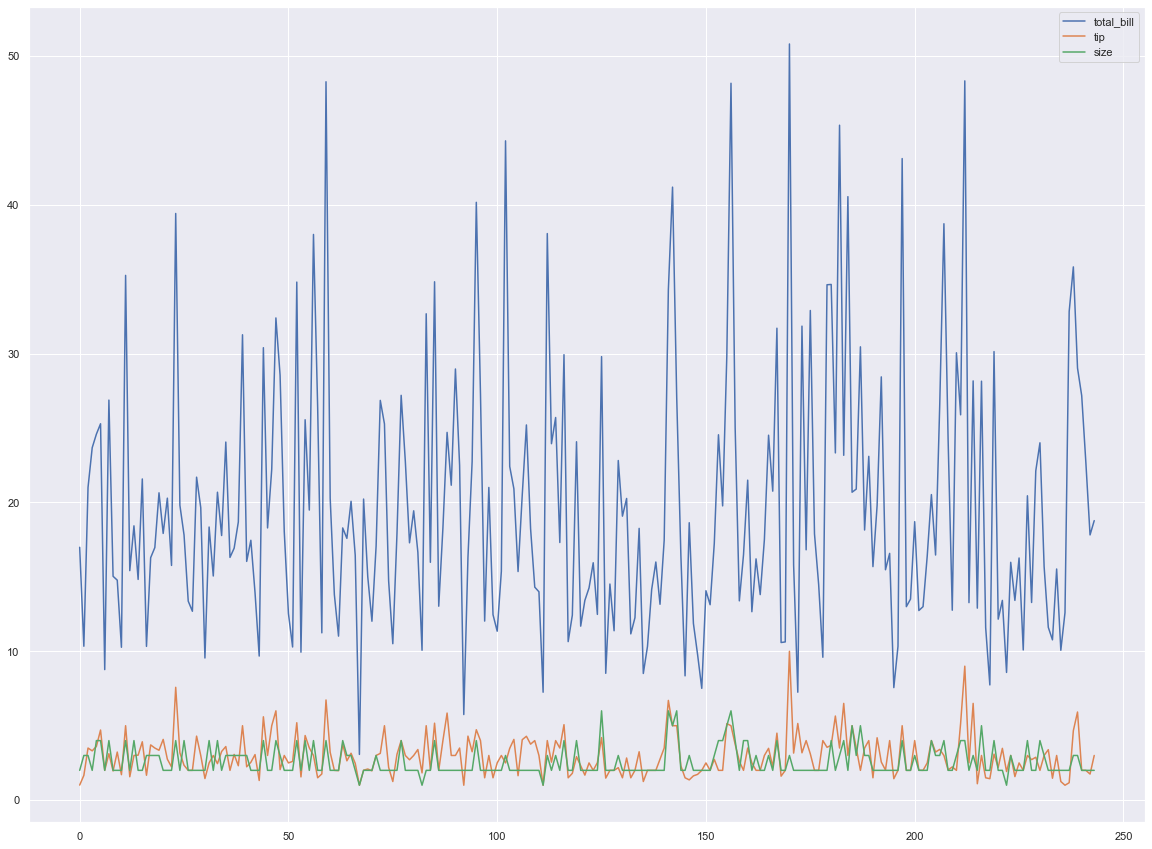

In [175]:
# Visualização

# Para estudar esse conjunto de dados, apenas obter
# as informações estatísticas pode ser difícil
# e tedioso. Vamos utilizar visualizações para obter insights.

# É possível acessar as funções do seaborn diretamente pelo Pandas.
# Essa forma de obter gráficos utilizamos durante o semestre todo.
# Acessamos essas funcionalidades pela função plot do DataFrame
tips.plot(figsize=(20,15))

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

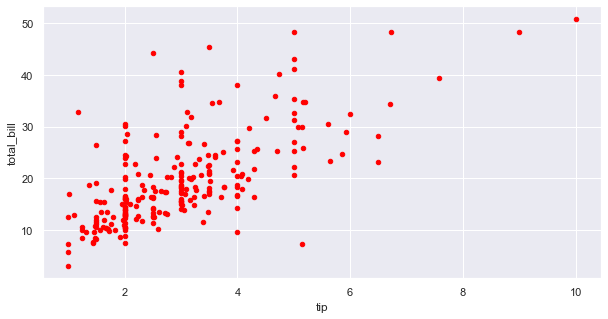

In [176]:
# Podemos acessar os tipos diferentes de gráficos por seus nomes
# Para fazer um gráfico de espalhamento, vamos utilizar
# a função scatter() do módulo plot do DataFrame 
# Note que agora é necessário passar os valores de x e y

tips.plot.scatter(x='tip',y='total_bill', c='red')

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

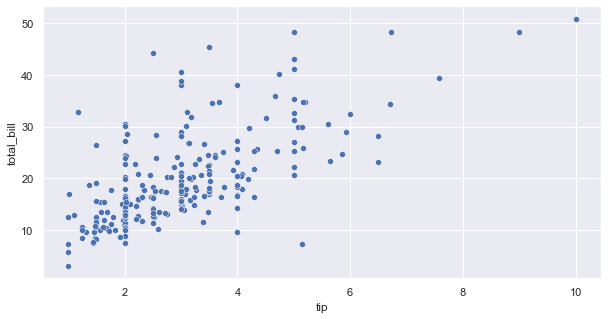

In [177]:
# Para utilizar o Seaborn diretamente, utilize a função scatter
# do Seaborn e passe o argumento data, que deve receber o conjunto de dados

sns.scatterplot(x='tip',y='total_bill',data=tips)

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

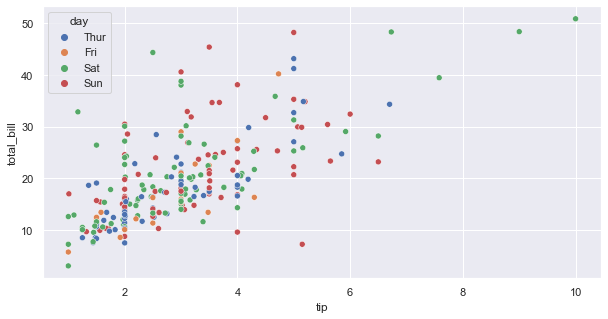

In [178]:
# Existem vantagens em se utilizar o módulo diretamente
# como maior controle dos argumentos.

# Uma das facilidades que o Seaborn proporciona em comparação
# ao Matplotlib é a passagem de argumentos para separar as cores
# de um gráfico com relação ao 

sns.scatterplot(x='tip',y='total_bill',data=tips,hue='day')

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

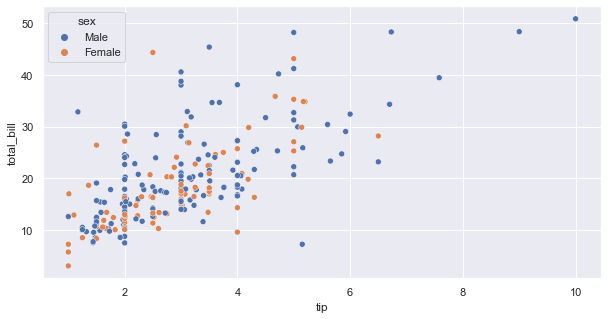

In [179]:
sns.scatterplot(x='tip',y='total_bill',data=tips,hue='sex')


<AxesSubplot:xlabel='tip', ylabel='total_bill'>

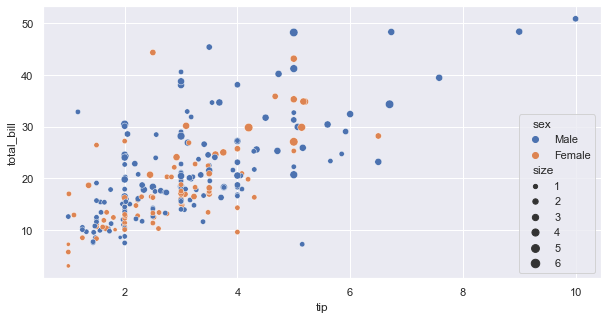

In [180]:
sns.scatterplot(x='tip',y='total_bill',data=tips,hue='sex',size='size')


<AxesSubplot:xlabel='tip', ylabel='size'>

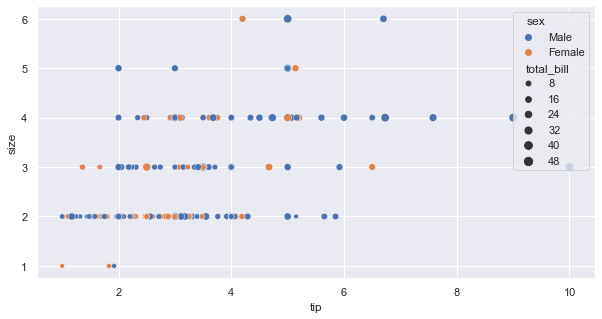

In [181]:
sns.scatterplot(x='tip',y='size',data=tips,hue='sex',size='total_bill')

In [182]:
gender = tips['sex'].value_counts()
gender

Male      157
Female     87
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7fce6ee03760>,
 [Text(-0.47909423581850497, 0.9901862012800839, 'Male'),
  Text(0.4790942358185044, -0.9901862012800842, 'Female')],
 [Text(-0.2613241286282754, 0.5401015643345912, '64.34%'),
  Text(0.2613241286282751, -0.5401015643345913, '35.66%')])

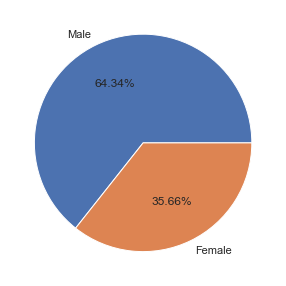

In [183]:
plt.pie(gender, labels=['Male','Female'], autopct='%1.2f%%')

In [184]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [185]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<AxesSubplot:>

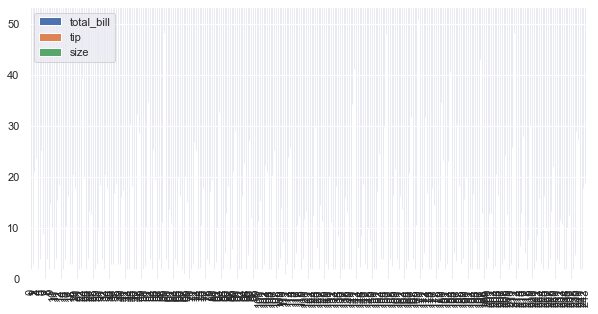

In [186]:
# Outro gráfico muito utilizado é o de barras. 

# Podemos fazer o gráfico com a função bar do módulo plot do DataFrame:
tips.plot.bar()

In [187]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   

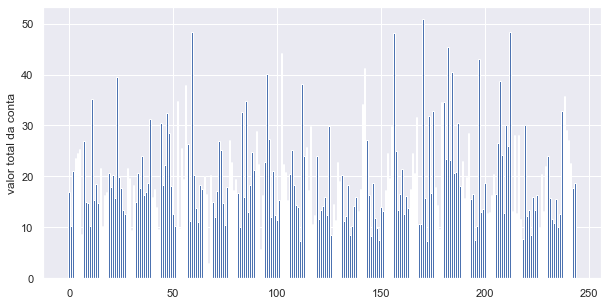

In [188]:
# Também podemos utilizar o Matplotlib para fazer um gráfico de barras
plt.bar(x=np.arange(len(tips)),height=tips['total_bill'])
plt.ylabel('valor total da conta')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

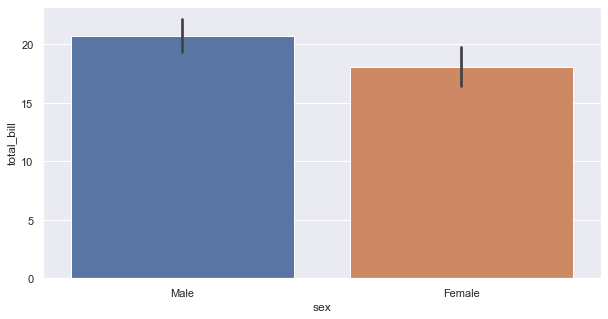

In [189]:
# Mas os gráficos de barra do Seaborn são obtidos muito mais facilmente
sns.barplot(x='sex',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

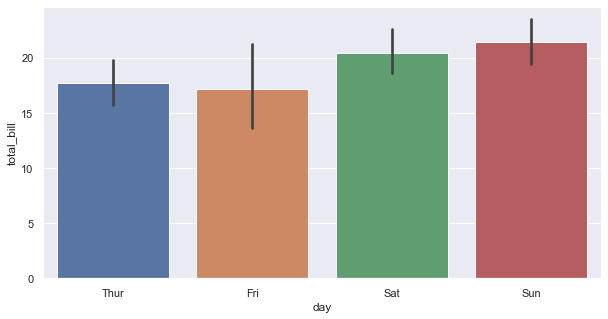

In [190]:
sns.barplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

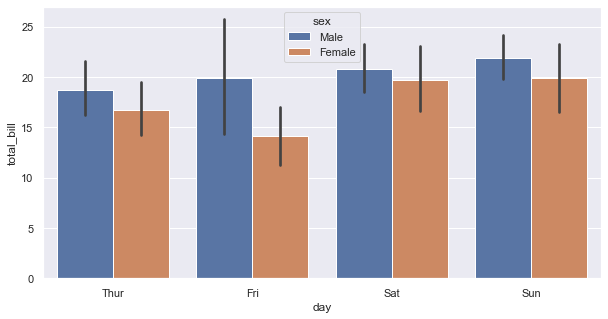

In [191]:
sns.barplot(x='day',y='total_bill',data=tips,hue='sex')

<AxesSubplot:xlabel='tip', ylabel='Count'>

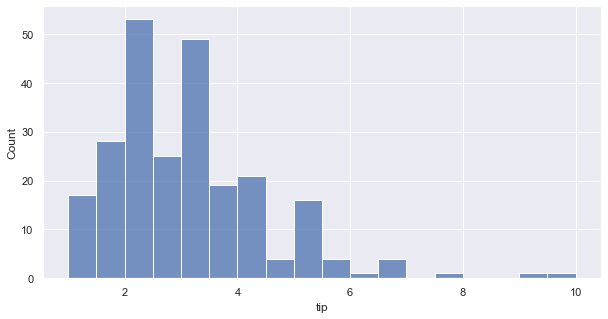

In [192]:
# Também estudamos o Histograma, em que queremos estudar 
# o número de vezes que uma certa instância repetiu seu valor.

sns.histplot(tips['tip'])

<AxesSubplot:xlabel='tip', ylabel='Count'>

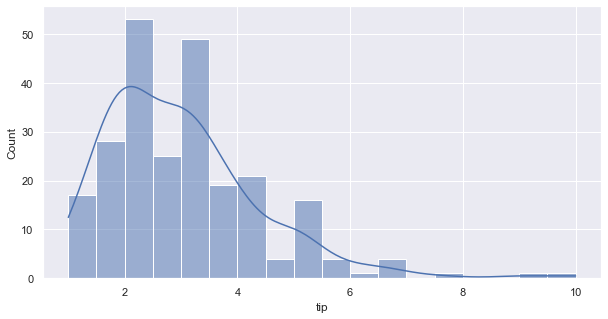

In [193]:
# É possível obter regressões utilizando uma curva de densidade de probabilidade
sns.histplot(tips['tip'],kde=True)

<AxesSubplot:xlabel='tip', ylabel='Count'>

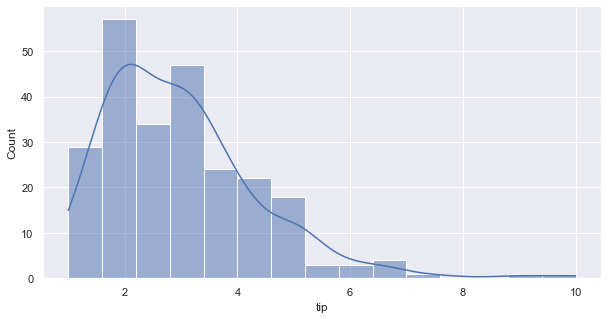

In [194]:
sns.histplot(tips['tip'],kde=True,bins=15)


<AxesSubplot:xlabel='day', ylabel='tip'>

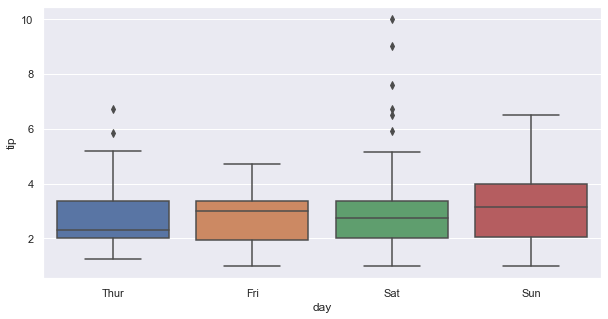

In [195]:
# Um gráfico importante é o Box Plot
sns.boxplot(x='day',y='tip',data=tips)

<AxesSubplot:xlabel='day', ylabel='tip'>

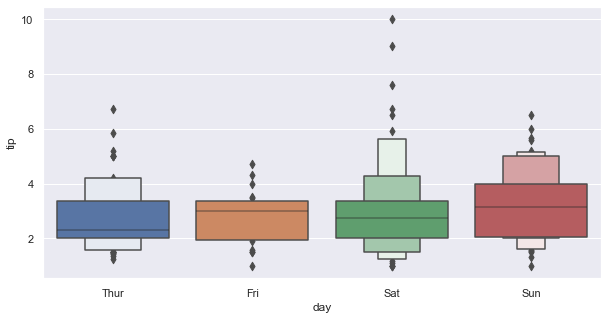

In [196]:
# Podemos representar mais quantis com a função boxenplot

sns.boxenplot(x='day',y='tip',data=tips)

<AxesSubplot:xlabel='day', ylabel='tip'>

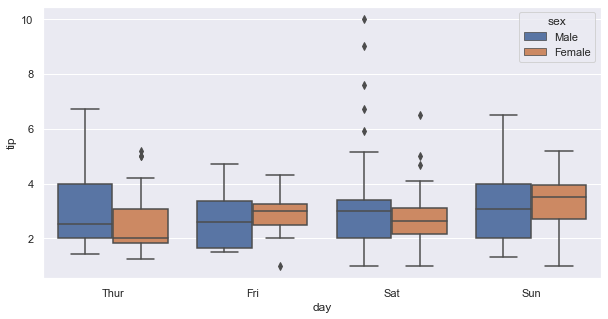

In [197]:
# É possível realizar agrupamentos facilmente passando parâmetros como hue
sns.boxplot(x='day',y='tip',data=tips,hue='sex')

<AxesSubplot:xlabel='day', ylabel='tip'>

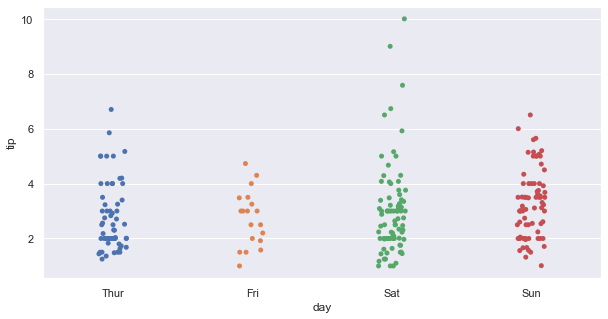

In [198]:
# Por fim, outro gráfico interessante de distribuição é o Strip Plot

sns.stripplot(x='day',y='tip',data=tips)

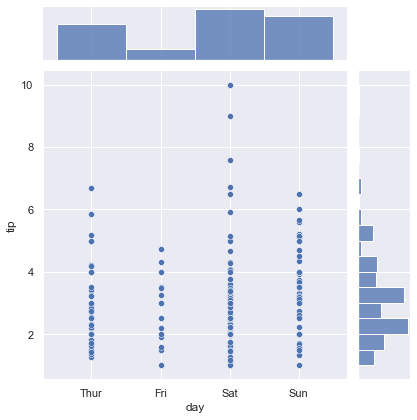

In [199]:
# Um Joint Plot junta o strip com o histograma 

sns.jointplot(x='day',y='tip',data=tips)

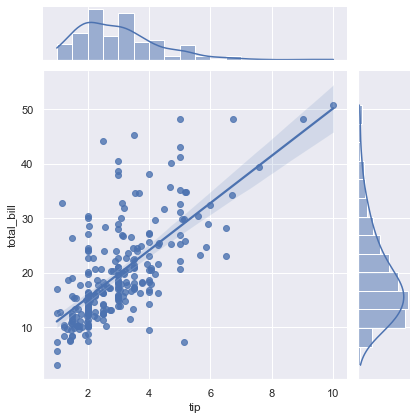

In [200]:
# E também pode apresentar curvas de probabilidade

sns.jointplot(x='tip',y='total_bill',data=tips,kind='reg')

In [201]:
# Para estudar correlação, vamos abrir o conjunto do Titanic

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [202]:
# Vamos procurar por correlações entre as variáveis com a função corr() do DataFrame
correlacao = titanic.corr()
correlacao

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

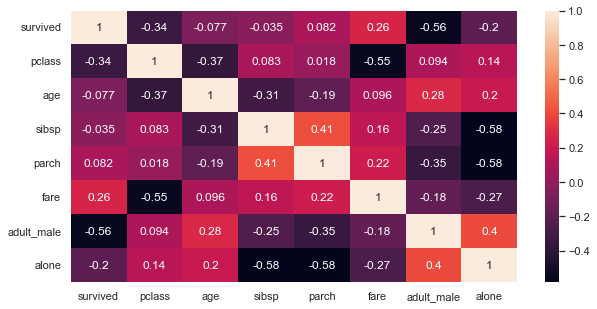

In [203]:
# É possível visualizar essa distribuição com um Mapa de Calor
# ou heatmap. Esse tipo de gráfico é muito comum e pode ajudar a 
# interpretar dados tabulares.

sns.heatmap(correlacao,annot=True)

<AxesSubplot:xlabel='who', ylabel='age'>

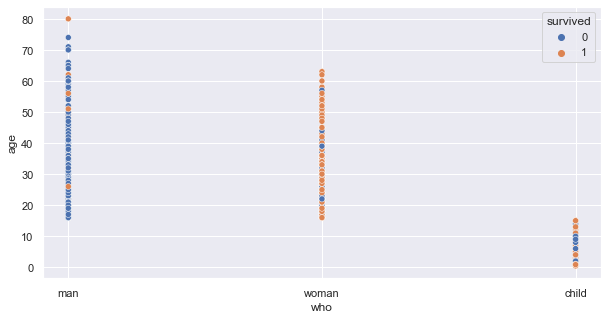

In [204]:
sns.scatterplot(x='who',y='age',data=titanic,hue='survived')

<AxesSubplot:xlabel='age', ylabel='class'>

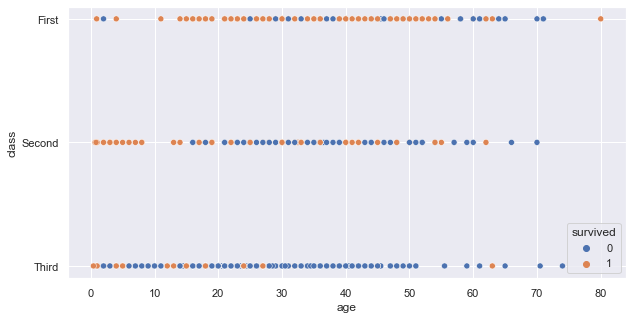

In [205]:
sns.scatterplot(x='age',y='class',data=titanic,hue='survived')

In [206]:
whose = titanic['who'].value_counts()
whose

man      537
woman    271
child     83
Name: who, dtype: int64

([<matplotlib.patches.Wedge at 0x7fce528dd640>,
 [Text(-0.3487593016911999, 1.0432482683828748, 'man'),
  Text(0.03296249724279082, -1.0995060135240367, 'woman'),
  Text(1.0532306714066144, -0.31734075188726113, 'child')],
 [Text(-0.1902323463770181, 0.5690445100270226, '60.27%'),
  Text(0.017979543950613172, -0.5997305528312927, '30.42%'),
  Text(0.5744894571308805, -0.17309495557486967, '9.32%')])

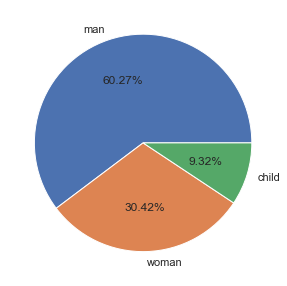

In [207]:
plt.pie(whose, labels=['man','woman','child'], autopct='%1.2f%%')

In [208]:
classes = titanic['class'].value_counts()
classes

Third     491
First     216
Second    184
Name: class, dtype: int64

([<matplotlib.patches.Wedge at 0x7fce52b0a4f0>,
 [Text(-0.17571616709359644, 1.0858746836637898, 'Third'),
  Text(-0.5160762002061153, -0.9714243951954356, 'First'),
  Text(0.8765111456658484, -0.664626369867719, 'Second')],
 [Text(-0.0958451820510526, 0.5922952819984307, '55.11%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.24%'),
  Text(0.47809698854500815, -0.36252347447330124, '20.65%')])

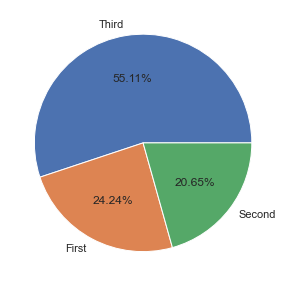

In [209]:
plt.pie(classes, labels=['Third','First','Second'], autopct='%1.2f%%')

In [210]:
survivors = titanic['survived'].value_counts()
survivors

0    549
1    342
Name: survived, dtype: int64

([<matplotlib.patches.Wedge at 0x7fce52c23370>,
 [Text(-0.39257493509945834, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.2141317827815227, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

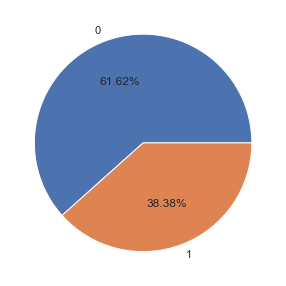

In [211]:
plt.pie(survivors, labels=['0','1'], autopct='%1.2f%%')

In [212]:
men = titanic[titanic['who'] == 'man']
men_lived = men['survived'].value_counts()
men_lived

0    449
1     88
Name: survived, dtype: int64

([<matplotlib.patches.Wedge at 0x7fce52cd5a30>,
 [Text(-0.9574176651983963, 0.5416192522114144, '0'),
  Text(0.9574176651983964, -0.541619252211414, '1')],
 [Text(-0.5222278173809434, 0.29542868302440783, '83.61%'),
  Text(0.5222278173809435, -0.29542868302440767, '16.39%')])

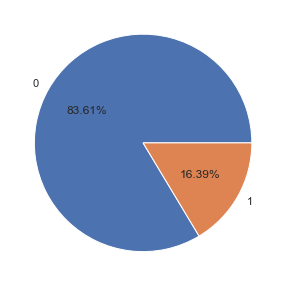

In [213]:
plt.pie(men_lived, labels=['0','1'], autopct='%1.2f%%')

In [214]:
women = titanic[titanic['who'] == 'woman']
women_lived = women['survived'].value_counts()
women_lived

1    205
0     66
Name: survived, dtype: int64

([<matplotlib.patches.Wedge at 0x7fce52da0100>,
 [Text(-0.7934359398704566, 0.7618788678798522, '1'),
  Text(0.7934359398704566, -0.7618788678798523, '0')],
 [Text(-0.4327832399293399, 0.4155702915708284, '75.65%'),
  Text(0.4327832399293399, -0.4155702915708285, '24.35%')])

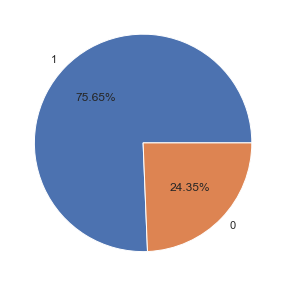

In [215]:
plt.pie(women_lived, labels=['1','0'], autopct='%1.2f%%')

In [216]:
children = titanic[titanic['who'] == 'child']
children_lived = children['survived'].value_counts()
children_lived

1    49
0    34
Name: survived, dtype: int64

([<matplotlib.patches.Wedge at 0x7fce52e557f0>,
 [Text(-0.30808939197115853, 1.0559739232361953, '1'),
  Text(0.3080892931037431, -1.0559739520816014, '0')],
 [Text(-0.16804875925699553, 0.5759857763106518, '59.04%'),
  Text(0.1680487053293144, -0.5759857920445097, '40.96%')])

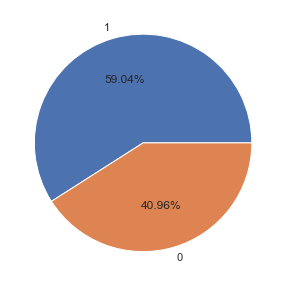

In [217]:
plt.pie(children_lived, labels=['1','0'], autopct='%1.2f%%')

## 49 children out of 83 survived, 205 women out of 271 survived, 88 men out of 537 survived

In [218]:
third = titanic[titanic['class'] == 'Third']
third_lived = third['survived'].value_counts()
third_lived

0    372
1    119
Name: survived, dtype: int64

([<matplotlib.patches.Wedge at 0x7fce52ebae20>,
 [Text(-0.7962546685013828, 0.7589324758433738, '0'),
  Text(0.7962547395577658, -0.7589324012926282, '1')],
 [Text(-0.4343207282734815, 0.4139631686418402, '75.76%'),
  Text(0.43432076703150857, -0.41396312797779716, '24.24%')])

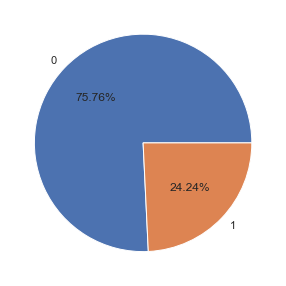

In [219]:
plt.pie(third_lived, labels=['0','1'], autopct='%1.2f%%')

In [220]:
first = titanic[titanic['class'] == 'First']
first_lived = first['survived'].value_counts()
first_lived

1    136
0     80
Name: survived, dtype: int64

([<matplotlib.patches.Wedge at 0x7fce52fcf5b0>,
 [Text(-0.43568768660363116, 1.010037741741355, '1'),
  Text(0.43568759203707097, -1.010037782533376, '0')],
 [Text(-0.23764782905652607, 0.5509296773134663, '62.96%'),
  Text(0.23764777747476595, -0.5509296995636596, '37.04%')])

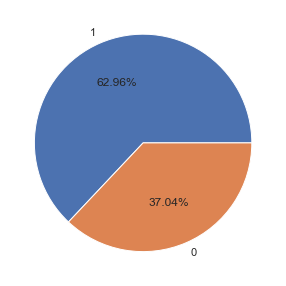

In [221]:
plt.pie(first_lived, labels=['1','0'], autopct='%1.2f%%')

In [222]:
second = titanic[titanic['class'] == 'Second']
second_lived = second['survived'].value_counts()
second_lived

0    97
1    87
Name: survived, dtype: int64

([<matplotlib.patches.Wedge at 0x7fce53085c10>,
 [Text(-0.09379236027223424, 1.0959940662040846, '0'),
  Text(0.0937924628866043, -1.0959940574226053, '1')],
 [Text(-0.05115946923940049, 0.5978149452022279, '52.72%'),
  Text(0.05115952521087507, -0.5978149404123301, '47.28%')])

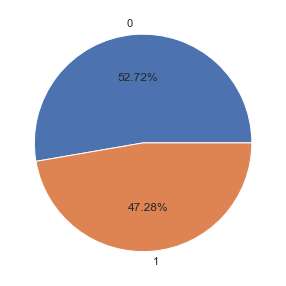

In [223]:
plt.pie(second_lived, labels=['0','1'], autopct='%1.2f%%')

In [224]:
anscombe = sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82
